In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV#网格搜索

In [4]:
data = pd.read_csv(r"C:\Users\Administrator\Data_ana\data.csv")#

In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
data.info()#分类不能是字符，一定要是int,float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.head()#标签不在最后一列，survival在第二列#探索数据

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#先来筛选特征
#Cabin缺失值太多，可以直接删除列
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)
#这里inplace-true是覆盖原数据。默认是false会创建新的对象
#axis=1删除列，对每行进行操作

In [12]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [15]:
#年龄缺的要填补
data["Age"] = data["Age"].fillna(data["Age"].mean())
#fillna是填补缺失值的一个函数，括号里填想用什么补

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [17]:
#决策树适用于大数据
#embarked有缺失值的行就删掉
data = data.dropna()#默认axis=0查询每一行

In [19]:
data.info()#现在无缺失值

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [21]:
data["Embarked"].unique()#.tolist()

array(['S', 'C', 'Q'], dtype=object)

In [23]:
labels = data["Embarked"].unique().tolist()

In [24]:
data["Embarked"]=data["Embarked"].apply(lambda x: labels.index(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
labels.index("S")
#用list的下标代替object

0

In [26]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,0
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,0


In [ ]:
data["Sex"] = (data["Sex"]=="male")

In [27]:
(data["Sex"]=="male")

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: Sex, Length: 889, dtype: bool

In [28]:
(data["Sex"]=="male").astype("int")#astype是转换类型的函数，true是1，false是0

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int32

In [30]:
data.loc[:,"Sex"]=(data["Sex"]=="male").astype("int")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [31]:
#现在特征和标签是在一起的，sklearn导入之前要把特征和标签分开
x = data.iloc[:,data.columns != "Survived"]

In [32]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.000000,1,0,7.2500,0
1,2,1,0,38.000000,1,0,71.2833,1
2,3,3,0,26.000000,0,0,7.9250,0
3,4,1,0,35.000000,1,0,53.1000,0
4,5,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,0,27.000000,0,0,13.0000,0
887,888,1,0,19.000000,0,0,30.0000,0
888,889,3,0,29.699118,1,2,23.4500,0
889,890,1,0,26.000000,0,0,30.0000,1


In [34]:
y= data.iloc[:,data.columns =="Survived"]

In [36]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size =0.3)

In [37]:
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
633,634,1,0,29.699118,0,0,0.0000,0
54,55,1,0,65.000000,0,1,61.9792,1
805,806,3,0,31.000000,0,0,7.7750,0
245,246,1,0,44.000000,2,0,90.0000,2
273,274,1,0,37.000000,0,1,29.7000,1
...,...,...,...,...,...,...,...,...
149,150,2,0,42.000000,0,0,13.0000,0
488,489,3,0,30.000000,0,0,8.0500,0
17,18,2,0,29.699118,0,0,13.0000,0
158,159,3,0,29.699118,0,0,8.6625,0


In [38]:
#行索引乱了
#恢复索引
Xtrain.index = range(Xtrain.shape[0])

In [40]:
Xtrain.shape[0]

622

In [39]:
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,634,1,0,29.699118,0,0,0.0000,0
1,55,1,0,65.000000,0,1,61.9792,1
2,806,3,0,31.000000,0,0,7.7750,0
3,246,1,0,44.000000,2,0,90.0000,2
4,274,1,0,37.000000,0,1,29.7000,1
...,...,...,...,...,...,...,...,...
617,150,2,0,42.000000,0,0,13.0000,0
618,489,3,0,30.000000,0,0,8.0500,0
619,18,2,0,29.699118,0,0,13.0000,0
620,159,3,0,29.699118,0,0,8.6625,0


In [41]:
for i in [Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])

In [43]:
Ytest

,Survived
0,0
1,0
2,0
3,1
4,1
...,...
262,0
263,0
264,1
265,0


In [45]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.6928838951310862

In [47]:
#模型效果不是很好
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=25)
score = cross_val_score(clf,x,y,cv=10).mean()

In [48]:
score

0.5995020429009192

In [60]:
#先调最大深度，画学习曲线
tr = []
te = []
for  i in range(10):
    clf = DecisionTreeClassifier(random_state = 25
                                ,max_depth = i+1
                                ,criterion="entropy"
                                )
    clf = clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)

In [63]:
print(max(te))

0.7030260469867211


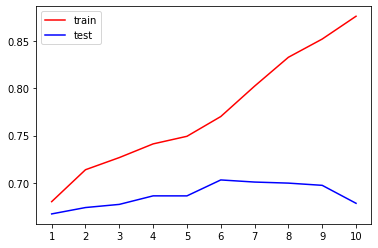

In [64]:
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [68]:
#网格搜索，同时调整多个参数
#一串参数，和这些参数对应的，希望网格搜索来搜索的取值范围
import numpy as np
gini_threholds = np.linspace(0,0.5,50)

parameters={"criterion":("gini","entropy")
           ,"splitter":("best","random")
           ,"max_depth":[*range(1,10)]
           ,"min_samples_leaf":[*range(1,50,5)]
           ,"min_impurity_decrease":[*np.linspace(0,0.5,50)]
           }

clf=DecisionTreeClassifier(random_state = 25)
#网格搜索同时满足fit,score，cross
GS = GridSearchCV(clf,parameters,cv=10)
GS = GS.fit(Xtrain,Ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [69]:
GS.best_params_#返回参数的最佳组合

{'criterion': 'gini',
 'max_depth': 6,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 21,
 'splitter': 'random'}

In [70]:
GS.best_score_#网格搜索之后最佳的准确性

0.72508038585209

In [67]:
import numpy as np
gini_threholds = np.linspace(0,0.5,50)
#随机的生成零到零点五的50个数字
#entropy_threholds = np.linspace(0,1,50)